# Wrangling Project DAND

# Introduction

In this project I do the wrangling process Gather-Asses-Clean on three datasets and its about a twitter account called WeRateDogs that rate peoples dogs with a funny comment and non-realistic ratings 

In [1]:
import pandas as pd
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import requests
import json
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gather
- CSV
- WEB
- Twitter

In [2]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head(2)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [3]:
#donwload the image predictions from web
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions.head(3)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [4]:
# tweet ID, retweet count, and favorite count
import json

df_list=[] 

with open('tweet-json copy', 'r') as tweets:
    for tweet in tweets:
        tweet = json.loads(tweet)
        df_list.append({'tweet_id': tweet['id'],
                        'retweets': tweet['retweet_count'],
                        'favorites': tweet['favorite_count']
                       })
df_json = pd.DataFrame(df_list, columns = ['tweet_id', 'retweets', 'favorites'])


df_json.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

df_json.head()


,tweet_id,retweets,favorites
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Asses

- Visul

In [5]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [6]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [7]:
df_json

,tweet_id,retweets,favorites
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


- Programmatic 

In [8]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
df_archive['tweet_id'].duplicated().sum()

0

In [10]:
df_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [11]:
df_archive['text'][df_archive['rating_denominator'] == 50]

1202    This is Bluebert. He just saw that both #Final...
1274    From left to right:\nCletus, Jerome, Alejandro...
1351    Here is a whole flock of puppers.  60/50 I'll ...
Name: text, dtype: object

In [12]:
df_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [13]:
df_archive['text'][df_archive['rating_numerator' ] == 960][313]

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [14]:
df_archive['text'].sample(10)

1790    Say hello to Axel. He's a Black Chevy Pinot on...
2238    This is Alfie. He's that one hypocritical gym ...
1970    Meet Eve. She's a raging alcoholic 8/10 (would...
2156    This is Skye. He is a Bretwaldian Altostratus....
520     This is Gus. He likes to be close to you, whic...
950     This is Brody. He's a lifeguard. Always prepar...
1730    This is Bruce. He's a rare pup. Covered in Fro...
237     Meet Daisy. She's been pup for adoption for mo...
2084    Say hello to Andy. He can balance on one foot,...
2299    Here we have a Hufflepuff. Loves vest. Eyes wi...
Name: text, dtype: object

In [15]:
df_archive['name'].value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
           ... 
Marty         1
Harrison      1
Nico          1
Cheryl        1
Leonard       1
Name: name, Length: 957, dtype: int64

In [16]:
df_archive[df_archive['rating_denominator'] != 10].shape[0]

23

In [17]:
df_archive[df_archive['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [18]:
df_archive.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
           ... 
Marty         1
Harrison      1
Nico          1
Cheryl        1
Leonard       1
Name: name, Length: 957, dtype: int64

In [19]:
df_archive[df_archive.name == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


In [20]:
for i in range(1000):
    print(df_archive['text'][i])
    print("")

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU

This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV

This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB

This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ

This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f

Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh

Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below

https://t.co/Zr4hWfAs1H http


This is Balto. He's very content. Legendary tongue slippage. 12/10 would pet forever https://t.co/T7Jr4Gw4sC

This is Riley. His owner put a donut pillow around him and he loves it so much he won't let anyone take it off. 13/10 https://t.co/8TCQcsZCZ8

This is Mairi. She has mastered the art of camouflage. 12/10 h*ckin sneaky af https://t.co/STcPjiNAHp

This is Loomis. He's the leader of the Kenneth search party. The passion is almost overwhelming. 12/10 one day he will be free https://t.co/kCRKlFg4AY

This is Finn. He likes eavesdropping from filing cabinets. It's a real issue but no one has approached him about it. 11/10 would still pet https://t.co/s8W8Del9HQ

Meet Godi. He's an avid beachgoer and part time rainbow summoner. Eyeliner flawless af. 13/10 would snug well https://t.co/BO936YdJdi

RT @dog_rates: This is Kenny. He just wants to be included in the happenings. 11/10 https://t.co/2S6oye3XqK

This is Dave. He's currently in a predicament. Doesn't seem to mind tho. 12/10 some

In [21]:
df_archive[df_archive['rating_numerator'] ==1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
1446,696490539101908992,6.964887e+17,4.196984e+09,2016-02-08 00:27:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After reading the comments I may have overesti...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
1869,675153376133427200,NaN,NaN,2015-12-11 03:21:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What kind of person sends in a picture without...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675153376...,1,10,None,None,None,None,None
1940,673716320723169284,6.737159e+17,4.196984e+09,2015-12-07 04:11:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The millennials have spoken and we've decided ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2091,670783437142401025,NaN,NaN,2015-11-29 01:56:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Flamboyant pup here. Probably poisonous. Won't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670783437...,1,10,None,None,None,None,None
2261,667549055577362432,NaN,NaN,2015-11-20 03:44:31 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Never seen dog like this. Breathes heavy. Tilt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667549055...,1,10,None,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None


In [22]:
# NOTICE that rating_numerator is not extracted correctly
df_archive['text'][2335]

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

In [23]:
print(df_archive.text.sample)


<bound method NDFrame.sample of 0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
                              ...                        
2351    Here we have a 1949 1st generation vulpix. Enj...
2352    This is a purebred Piers Morgan. Loves to Netf...
2353    Here is a very happy pup. Big fan of well-main...
2354    This is a western brown Mitsubishi terrier. Up...
2355    Here we have a Japanese Irish Setter. Lost eye...
Name: text, Length: 2356, dtype: object>


In [24]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
image_predictions.jpg_url.duplicated().sum()

66

In [26]:
image_predictions.jpg_url.value_counts()

https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg    2
https://pbs.twimg.com/media/CtKHLuCWYAA2TTs.jpg    2
https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg    2
https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg    2
https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg    2
                                                  ..
https://pbs.twimg.com/media/CwRN8H6WgAASe4X.jpg    1
https://pbs.twimg.com/media/C0AIwgVXAAAc1Ig.jpg    1
https://pbs.twimg.com/media/C2PjgjQXcAAc4Uu.jpg    1
https://pbs.twimg.com/media/CaFg41YWkAAdOjy.jpg    1
https://pbs.twimg.com/media/CXrIntsUsAEkv0d.jpg    1
Name: jpg_url, Length: 2009, dtype: int64

In [27]:
image_predictions[image_predictions['jpg_url'] == 'https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1533,789986466051088384,https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg,1,tub,0.479477,False,bathtub,0.325106,False,golden_retriever,0.07853,True
1538,790723298204217344,https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg,1,tub,0.479477,False,bathtub,0.325106,False,golden_retriever,0.07853,True


In [28]:
image_predictions.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
canoe                   1
robin                   1
nail                    1
toilet_seat             1
Madagascar_cat          1
Name: p1, Length: 378, dtype: int64

In [29]:
image_predictions.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
coffee_mug              1
ice_lolly               1
hummingbird             1
umbrella                1
confectionery           1
Name: p2, Length: 405, dtype: int64

In [30]:
image_predictions.p3.value_counts()

Labrador_retriever      79
Chihuahua               58
golden_retriever        48
Eskimo_dog              38
kelpie                  35
                        ..
entertainment_center     1
crayfish                 1
wild_boar                1
shower_cap               1
wok                      1
Name: p3, Length: 408, dtype: int64

In [31]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweet_id   2354 non-null   int64
 1   retweets   2354 non-null   int64
 2   favorites  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [32]:
df_json


,tweet_id,retweets,favorites
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [33]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

## QUALITY
##### df_archive

- tweet_id dtype is INTEGER in all 3 tables (DONE)
- rating_numerator is INT (DONE)
- rating_denominator is INT (DONE)
- timestamp is STRING (DONE)
- some denominators values are not 10 (DONE)
- 'None' in name column (DONE)
- some ratings are not extracted correctly from the text (DONE)
- unnecessary  columns for analysis (DONE)
##### IMAGE_PREDICTIONS
- some URL's are duplicated (DONE)
- df_archive has more rows than image_predictions (DONE)

### TIDINESS

- Doge stage is splitted in 4 columns ( NOT MELTED ) (DONE)
- image_predictions and df_json should join the df_archive on tweet_id (DONE)

# Cleaning

In [34]:
df_archive_clean = df_archive.copy()
image_predictions_clean = image_predictions.copy()
df_json_clean = df_json.copy()

##### Define
Convert timestamp from string to datetime

#### code

In [35]:
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean['timestamp'])

#### Test

In [36]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

#### Define
Convert tweet_id to STRING

#### Code

In [37]:
df_archive_clean['tweet_id'] = df_archive_clean['tweet_id'].astype(str)
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)
df_json_clean['tweet_id'] = df_json_clean['tweet_id'].astype(str)




#### Test

In [38]:
print(df_archive_clean.tweet_id.dtype)
print(image_predictions_clean.tweet_id.dtype)
print(df_json_clean.tweet_id.dtype)

object
object
object


#### Define
Convert rating_numerator and rating_denominator from INT to FLOAT

#### Code

In [39]:
df_archive_clean['rating_numerator'] = df_archive_clean['rating_numerator'].astype(float)
df_archive_clean['rating_denominator'] = df_archive_clean['rating_denominator'].astype(float)

#### Test

In [40]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   float64         

#### Define
Fix rating_denominator that is not equal to 10

#### Code

In [41]:
df_archive_clean['rating_denominator'] = np.where(df_archive_clean['rating_denominator'] !=10, 10, df_archive_clean['rating_denominator'])

#### Test

In [42]:
df_archive_clean[df_archive_clean['rating_denominator'] != 10].shape[0]

0

In [43]:
df_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,a,None,None,None,None


#### Define
Change the 'None' in name column to NAN

#### Code

In [44]:
df_archive_clean['name'] = df_archive_clean['name'].apply(lambda x: x if x != 'None' else np.nan)

#### Test

In [45]:
df_archive_clean[df_archive_clean.name == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define
#### Fix rating_numerator that are not extracted correctly from the text 

#### Code

In [46]:
df_archive_clean['rating_numerator'] = df_archive_clean.text.str.extract(".*\s(\d+)\/\d+.*", expand = True)

##### Test

In [47]:
df_archive_clean['text'][2335]

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

In [48]:
df_archive_clean['rating_numerator'][2335]

'9'

In [49]:
df_archive['rating_numerator'][2335]

1

In [50]:
df_archive_clean = df_archive_clean[df_archive_clean['rating_numerator'].notnull()]



In [51]:
df_archive_clean[df_archive_clean['rating_numerator'].isnull()]



,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [52]:
df_archive_clean['rating_numerator'] = df_archive_clean['rating_numerator'].astype(float)


<ipython-input-52-38fd421bf33a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_archive_clean['rating_numerator'] = df_archive_clean['rating_numerator'].astype(float)


#### Define
Melt dog stage to one column

#### Code

In [53]:
vars_list = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text',
             'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp',
             'expanded_urls', 'rating_numerator', 'rating_denominator', 'name']

df_archive_clean = pd.melt(df_archive_clean, id_vars = vars_list, 
                         value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
                         var_name = 'stages', value_name = 'dog_stage')

df_archive_clean = df_archive_clean.drop('stages', 1)

#### Test

In [54]:
df_archive_clean.dog_stage.value_counts()


None       8858
pupper      255
doggo        96
puppo        29
floofer      10
Name: dog_stage, dtype: int64

In [55]:
df_archive_clean = df_archive_clean.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')

In [56]:
df_archive_clean.dog_stage.value_counts()



None       1936
pupper      255
doggo        82
puppo        29
floofer      10
Name: dog_stage, dtype: int64

In [57]:
df_archive_clean.shape[0]

2312

#### Define

Delete columns that is not useful for analysis

#### Code

In [58]:
Fdf_archive_clean = df_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','source',
                                          'retweeted_status_id',
                                          'retweeted_status_user_id', 
                                          'retweeted_status_timestamp', 
                                          'expanded_urls'], 1)

In [59]:
df_archive_clean.sample(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
3421,729113531270991872,2016-05-08 00:59:46+00:00,"""Challenge accepted""\n10/10 https://t.co/vNjvr...",10.0,10.0,NaN,None
3095,773922284943896577,2016-09-08 16:33:46+00:00,"This is Heinrich (pronounced ""Pat""). He's a Bo...",12.0,10.0,Heinrich,None


#### Define
Delete the duplicated URL's


#### Code

In [60]:
image_predictions_clean = image_predictions_clean.drop_duplicates(subset=['jpg_url'], keep='last')

#### Test

In [61]:
image_predictions_clean['jpg_url'].duplicated().sum()

0

#### Define
Fix the problem of df_archive that has more rows than image_predictions 

#### Code

In [62]:
tw = pd.merge(df_archive_clean, 
                      image_predictions_clean, 
                      how = 'left', on = ['tweet_id'])

In [63]:
tw = tw[tw['jpg_url'].notnull()]


#### Test 

In [64]:
tw.shape[0] == image_predictions_clean.shape[0]

False

In [65]:
tw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1978 entries, 0 to 2311
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1978 non-null   object             
 1   timestamp           1978 non-null   datetime64[ns, UTC]
 2   text                1978 non-null   object             
 3   rating_numerator    1978 non-null   float64            
 4   rating_denominator  1978 non-null   float64            
 5   name                1438 non-null   object             
 6   dog_stage           1978 non-null   object             
 7   jpg_url             1978 non-null   object             
 8   img_num             1978 non-null   float64            
 9   p1                  1978 non-null   object             
 10  p1_conf             1978 non-null   float64            
 11  p1_dog              1978 non-null   object             
 12  p2                  1978 non-null 

#### Define 
Merge all Tables

#### Code

In [66]:
df_json_clean

,tweet_id,retweets,favorites
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [67]:
df_merged = pd.merge(tw, df_json_clean, 
                      how = 'left', on = ['tweet_id'])

#### Test

In [68]:
df_merged

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweets,favorites
0,667550904950915073,2015-11-20 03:51:52+00:00,RT @dogratingrating: Exceptional talent. Origi...,12.0,10.0,NaN,None,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1.0,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True,37.0,0.0
1,667549055577362432,2015-11-20 03:44:31+00:00,Never seen dog like this. Breathes heavy. Tilt...,1.0,10.0,NaN,None,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,1.0,electric_fan,0.984377,False,spotlight,0.007737,False,lampshade,0.001901,False,2454.0,6138.0
2,667546741521195010,2015-11-20 03:35:20+00:00,Here is George. George took a selfie of his ne...,9.0,10.0,George,None,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,1.0,toy_poodle,0.787424,True,miniature_poodle,0.202225,True,teddy,0.004047,False,138.0,355.0
3,667544320556335104,2015-11-20 03:25:43+00:00,"This is Kial. Kial is either wearing a cape, w...",4.0,10.0,Kial,None,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,1.0,Pomeranian,0.412893,True,Pembroke,0.312958,True,Chihuahua,0.071960,True,568.0,917.0
4,667538891197542400,2015-11-20 03:04:08+00:00,This is a southwest Coriander named Klint. Hat...,9.0,10.0,a,None,https://pbs.twimg.com/media/CUOTFZOW4AABsfW.jpg,1.0,Yorkshire_terrier,0.618957,True,silky_terrier,0.300313,True,Australian_terrier,0.053412,True,72.0,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1973,743253157753532416,2016-06-16 01:25:36+00:00,This is Kilo. He cannot reach the snackum. Nif...,10.0,10.0,Kilo,puppo,https://pbs.twimg.com/media/ClCQzFUUYAA5vAu.jpg,1.0,malamute,0.442612,True,Siberian_husky,0.368137,True,Eskimo_dog,0.177822,True,1366.0,4624.0
1974,874012996292530176,2017-06-11 21:18:31+00:00,This is Sebastian. He can't see all the colors...,13.0,10.0,Sebastian,puppo,https://pbs.twimg.com/media/DCEeLxjXsAAvNSM.jpg,2.0,Cardigan,0.806674,True,Pembroke,0.116622,True,kelpie,0.049182,True,11007.0,35501.0
1975,859607811541651456,2017-05-03 03:17:27+00:00,Sorry for the lack of posts today. I came home...,13.0,10.0,NaN,puppo,https://pbs.twimg.com/media/C-3wvtxXcAUTuBE.jpg,1.0,golden_retriever,0.895529,True,Irish_setter,0.024099,True,Labrador_retriever,0.019285,True,1704.0,19476.0
1976,738537504001953792,2016-06-03 01:07:16+00:00,This is Bayley. She fell asleep trying to esca...,11.0,10.0,Bayley,puppo,https://pbs.twimg.com/media/Cj_P7rSUgAAYQbz.jpg,1.0,chow,0.808737,True,gibbon,0.028942,False,Pembroke,0.026498,True,1759.0,5575.0


## Visualizations

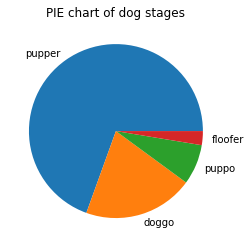

In [69]:
plt.title("PIE chart of dog stages")

plt.pie(df_merged[df_merged['dog_stage'] != 'None']['dog_stage'].value_counts()
        , labels = ['pupper','doggo','puppo','floofer']);


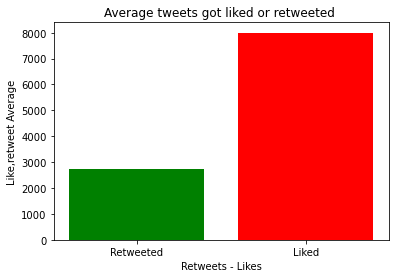

In [70]:
plt.bar(["Retweeted", "Liked"], [df_merged.retweets.mean(), df_merged.favorites.mean()],color=['green','red'])
plt.title("Average tweets got liked or retweeted ")
plt.xlabel("Retweets - Likes")
plt.ylabel("Like,retweet Average");

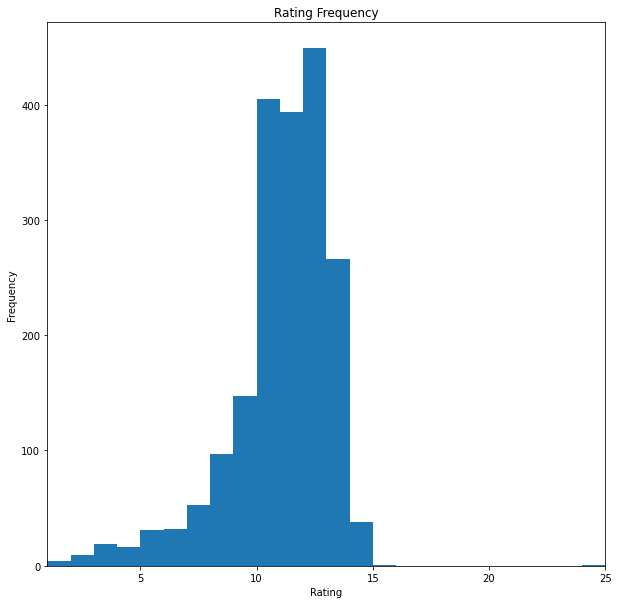

In [71]:
df_merged['rating_numerator'].plot(kind='hist',bins=range(0,150),figsize=(10,10));
plt.xlabel('Rating');
plt.xlim([1, 25]);
plt.title('Rating Frequency');


In [72]:
df_merged.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index=False)